In [1]:
#Import modules

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#Membaca data set

london_crime = pd.read_csv('london_crime_by_lsoa.csv')

In [3]:
#Melihat gambaran data berdasarkan baris awal

london_crime.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [4]:
#Melihat gambaran data berdasarkan baris akhir

london_crime.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [5]:
#Melihat jumlah baris dan kolom

london_crime.shape

(13490604, 7)

In [6]:
#Melihat tipe data

london_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [7]:
#Melihat list header kolom

london_crime.columns.values

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

In [8]:
#Melihat list index baris

london_crime.index.values

array([       0,        1,        2, ..., 13490601, 13490602, 13490603])

In [9]:
#Memeriksa apakah ada objek null

london_crime.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [10]:
#Melihat ringkasan singkat 

london_crime.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


In [26]:
#Analisa Kejahatan terbanyak berdasarkan major_category selama tahun 2008-2016

london_crime_cat = (london_crime.groupby('major_category')['value'].sum()).sort_values(ascending=False)
london_crime_cat

major_category
Theft and Handling             2661861
Violence Against the Person    1558081
Burglary                        754293
Criminal Damage                 630938
Drugs                           470765
Robbery                         258873
Other Notifiable Offences       106349
Fraud or Forgery                  5325
Sexual Offences                   1273
Name: value, dtype: int64

In [12]:
#Analisa Kejahatan yang terjadi sejak tahun 2011 sampai 2016

london_crime_cat = london_crime[
            (london_crime['year'] > 2010)
            ].groupby(['major_category','year'])['value'].sum()
london_crime_cat

major_category               year
Burglary                     2011     93315
                             2012     93392
                             2013     87222
                             2014     76053
                             2015     70489
                             2016     68285
Criminal Damage              2011     70914
                             2012     62158
                             2013     56206
                             2014     59279
                             2015     62976
                             2016     64071
Drugs                        2011     57550
                             2012     51776
                             2013     50278
                             2014     44435
                             2015     39785
                             2016     38914
Fraud or Forgery             2011         0
                             2012         0
                             2013         0
                             2014         

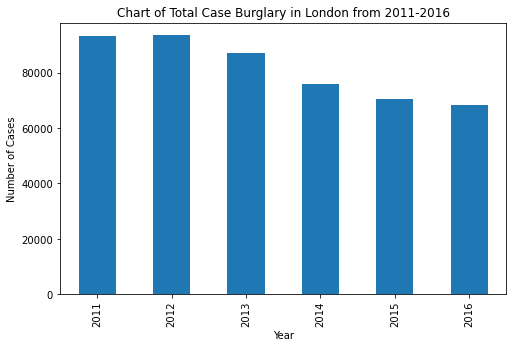

In [13]:
#Analisa jumlah kasus Burglary dari tahun 2011-2016

##Kesimpulan : Kasus Burglary di London mengalami penurunan dimulai sejak tahun 2013

london_crime_cat['Burglary'].plot(kind='bar', figsize=(8, 5))

plt.title('Chart of Total Case Burglary in London from 2011-2016') # add a title to the histogram
plt.ylabel('Number of Cases') # add y-label
plt.xlabel('Year') # add x-label

plt.show()

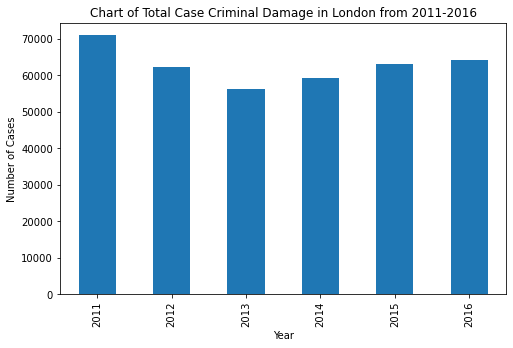

In [14]:
#Analisa jumlah kasus Criminal Damage dari tahun 2011-2016

##Kesimpulan : Kasus Criminal Damage di London mengalami peningkatan dimulai sejak tahun 2013

london_crime_cat['Criminal Damage'].plot(kind='bar', figsize=(8, 5))

plt.title('Chart of Total Case Criminal Damage in London from 2011-2016') # add a title to the histogram
plt.ylabel('Number of Cases') # add y-label
plt.xlabel('Year') # add x-label

plt.show()

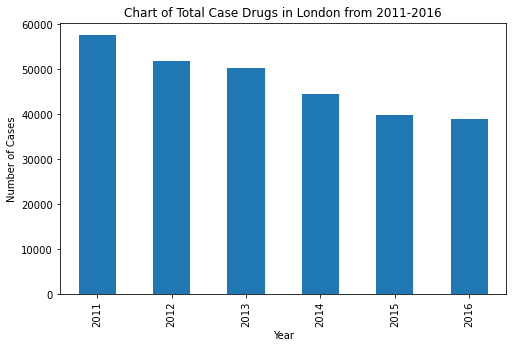

In [15]:
#Analisa jumlah kasus Drugs dari tahun 2011-2016

##Kesimpulan : Kasus Drugs di London mengalami penurunan dimulai sejak tahun 2013

london_crime_cat['Drugs'].plot(kind='bar', figsize=(8, 5))

plt.title('Chart of Total Case Drugs in London from 2011-2016') # add a title to the histogram
plt.ylabel('Number of Cases') # add y-label
plt.xlabel('Year') # add x-label

plt.show()

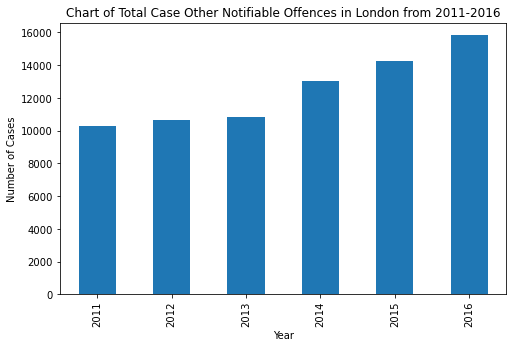

In [16]:
#Analisa jumlah kasus Other Notifiable Offences dari tahun 2011-2016

##Kesimpulan : Kasus Other Notifiable Offences di London mengalami peningkatan dimulai sejak tahun 2014

london_crime_cat['Other Notifiable Offences'].plot(kind='bar', figsize=(8, 5))

plt.title('Chart of Total Case Other Notifiable Offences in London from 2011-2016') # add a title to the histogram
plt.ylabel('Number of Cases') # add y-label
plt.xlabel('Year') # add x-label

plt.show()

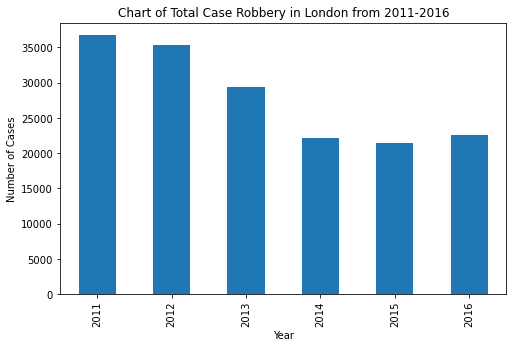

In [17]:
#Analisa jumlah kasus Robbery dari tahun 2011-2016

##Kesimpulan : Kasus Robbery di London stabil sejak tahun 2014

london_crime_cat['Robbery'].plot(kind='bar', figsize=(8, 5))

plt.title('Chart of Total Case Robbery in London from 2011-2016') # add a title to the histogram
plt.ylabel('Number of Cases') # add y-label
plt.xlabel('Year') # add x-label

plt.show()

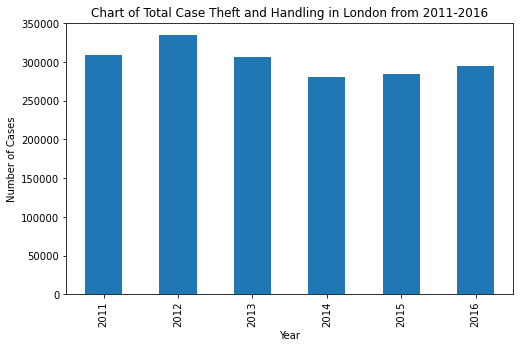

In [18]:
#Analisa jumlah kasus Theft and Handling dari tahun 2011-2016

##Kesimpulan : Kasus Theft and Handling di London cenderung stabil sejak tahun 2014

london_crime_cat['Theft and Handling'].plot(kind='bar', figsize=(8, 5))

plt.title('Chart of Total Case Theft and Handling in London from 2011-2016') # add a title to the histogram
plt.ylabel('Number of Cases') # add y-label
plt.xlabel('Year') # add x-label

plt.show()

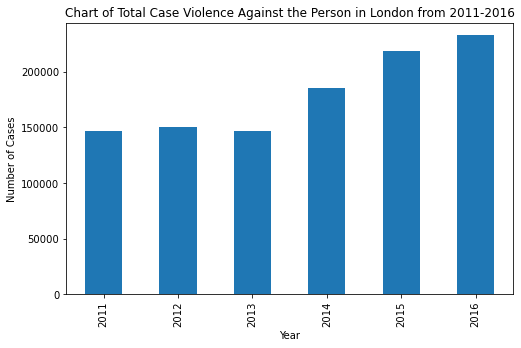

In [19]:
#Analisa jumlah kasus Violence Against the Person dari tahun 2011-2016

##Kesimpulan : Kasus Violence Against the Person di London cenderung meningkat sejak tahun 2014

london_crime_cat['Violence Against the Person'].plot(kind='bar', figsize=(8, 5))

plt.title('Chart of Total Case Violence Against the Person in London from 2011-2016') # add a title to the histogram
plt.ylabel('Number of Cases') # add y-label
plt.xlabel('Year') # add x-label

plt.show()

In [20]:
#Melihat Kejahatan yang terjadi sejak tahun 2011

london_crime_cat_2011 = london_crime[
            (london_crime['year'] == 2011)
            ].groupby('major_category')['value'].sum()
london_crime_cat_2011

major_category
Burglary                        93315
Criminal Damage                 70914
Drugs                           57550
Fraud or Forgery                    0
Other Notifiable Offences       10264
Robbery                         36679
Sexual Offences                     0
Theft and Handling             309292
Violence Against the Person    146901
Name: value, dtype: int64

In [21]:
#Melihat Kejahatan yang terjadi sejak tahun 2011

london_crime_cat_2016 = london_crime[
            (london_crime['year'] == 2016)
            ].groupby('major_category')['value'].sum()
london_crime_cat_2016

major_category
Burglary                        68285
Criminal Damage                 64071
Drugs                           38914
Fraud or Forgery                    0
Other Notifiable Offences       15809
Robbery                         22528
Sexual Offences                     0
Theft and Handling             294133
Violence Against the Person    232381
Name: value, dtype: int64

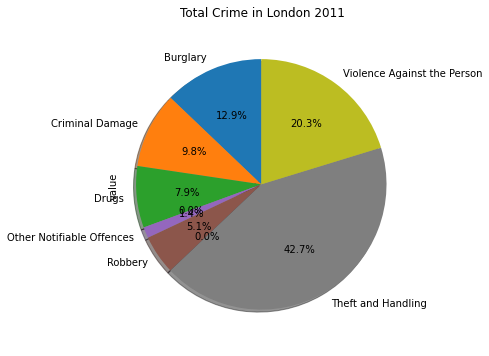

In [22]:
#Analisa persebaran kasus di tahun 2011

london_crime_cat_2011.plot(kind='pie',figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Total Crime in London 2011')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

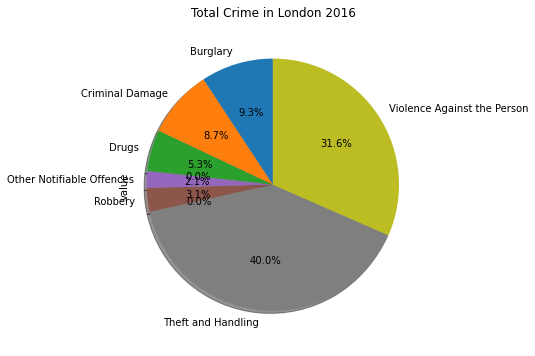

In [23]:
#Analisa persebaran kasus di tahun 2016 vs 2011

##Kesimpulan : Terjadi peningkatan kasus yaitu Violence Against the Person dan Criminal Damage jika dibandingkan dengan 2011

london_crime_cat_2016.plot(kind='pie',figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Total Crime in London 2016')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

In [24]:
#Analisa Wilayah berdasarkan jumlah kasus di tahun 2016

london_crime_borough = (london_crime[
            (london_crime['year'] == 2016)
            ].groupby('borough')['value'].sum()).sort_values(ascending=False)
london_crime_borough

borough
Westminster               48330
Lambeth                   34071
Southwark                 31636
Newham                    30090
Tower Hamlets             29253
Camden                    29183
Croydon                   28712
Hackney                   28265
Haringey                  27174
Ealing                    27127
Islington                 27092
Brent                     26693
Barnet                    24684
Hillingdon                24341
Lewisham                  23904
Wandsworth                23679
Greenwich                 22730
Enfield                   22485
Hounslow                  22251
Waltham Forest            20716
Hammersmith and Fulham    20174
Bromley                   20164
Kensington and Chelsea    19580
Redbridge                 19502
Havering                  16903
Barking and Dagenham      16741
Harrow                    13153
Bexley                    12840
Merton                    12755
Richmond upon Thames      11074
Sutton                    10658


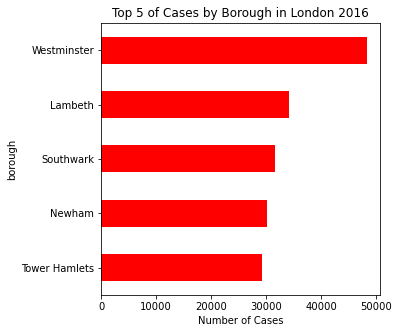

In [25]:
#Analisa Top 5 Wilayah berdasarkan jumlah kasus di tahun 2016ß

london_crime_borough_top5 = (london_crime_borough.head(5)).sort_values()
london_crime_borough_top5.plot(kind='barh', figsize=(5, 5), color='red')
plt.xlabel('Number of Cases')
plt.title('Top 5 of Cases by Borough in London 2016')
plt.show()